In [2]:
%matplotlib inline

In [289]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import find_peaks_cwt
from scipy import signal, interpolate
from scipy.interpolate import Cubic

## Import Image

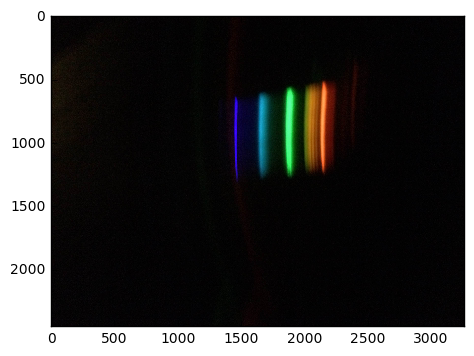

In [623]:
infile = 'data/CFL_example.JPG'
img = nd.imread(infile)

plt.imshow(img)

In [563]:
# read spectral data for mercury from NIST
fname = '/Users/Gioia/Desktop/mercury.txt'
Hg = np.loadtxt(fname)

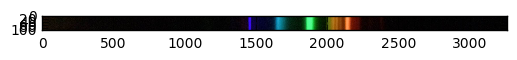

In [556]:
# take just a slice of the image.  If we sum on the columns, the 
# curve of the disc may create longer color lines.  Subsetting the
# image is a way to try and avoid this
plt.imshow(img[900:1000,:,:])

In [624]:
# create 1d array for later use
img1d = img[900:1000, :, :].mean(axis=0).mean(axis=1)

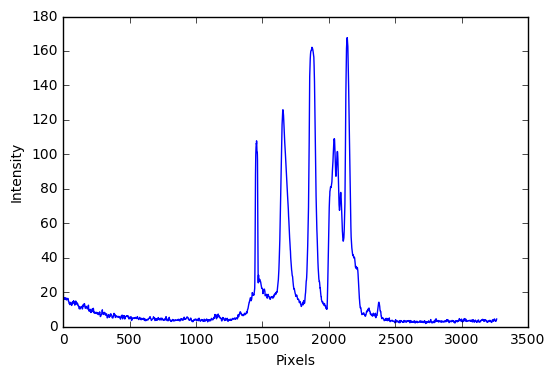

In [650]:
plt.plot(img1d)
plt.ylabel('Intensity')
plt.xlabel('Pixels')

In [628]:
# get the index of the highest peak for each color
x_red = img[900:1000,:,0].mean(axis=0).argmax()
x_green = img[900:1000,:,1].mean(axis=0).argmax()
x_blue = img[900:1000,:,2].mean(axis=0).argmax()

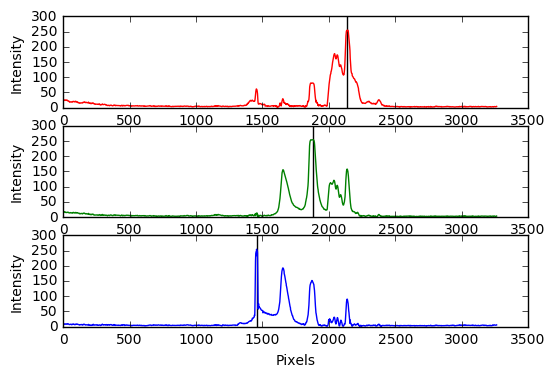

In [649]:
# average columns in each band
fig, ax = plt.subplots(3)
ax[0].plot(img[900:1000,:,0].mean(axis=0), color='red')
ax[0].vlines(x_red, 0,300)
ax[0].set_ylabel('Intensity')
ax[1].plot(img[900:1000,:,1].mean(axis=0), color='green')
ax[1].vlines(x_green, 0,300)
ax[1].set_ylabel('Intensity')
ax[2].plot(img[900:1000,:,2].mean(axis=0), color='blue')
ax[2].vlines(x_blue, 0,300)
ax[2].set_ylabel('Intensity')
plt.xlabel('Pixels')

In [630]:
# The red channel doesnt have a clear peak for mercury so 
# we'll only use blue and green
x = np.array([x_blue, x_green, x_red], dtype=float)
print x

[ 1456.  1878.  2138.]


In [631]:
# we're fittig a polynomical regression
X = np.column_stack((x,x**2))
print X

[[  1.45600000e+03   2.11993600e+06]
 [  1.87800000e+03   3.52688400e+06]
 [  2.13800000e+03   4.57104400e+06]]


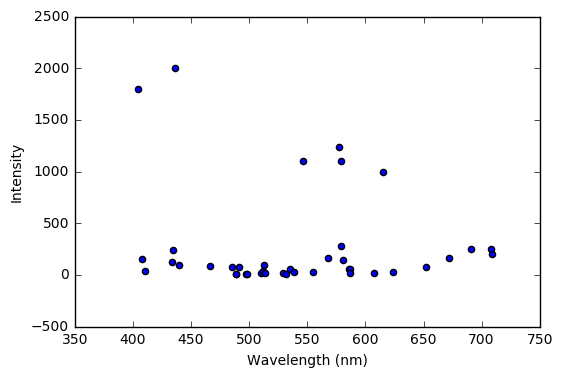

In [633]:
# known data spectra
plt.scatter(Hg[:,0]/10, Hg[:,1])
plt.ylabel('Intensity')
plt.xlabel('Wavelength (nm)')

In [634]:
# find peak values in the mercury spectra
print np.sort(Hg[Hg[:,1].argsort()][-6:,0] / 10)

[ 404.656  435.833  546.074  576.96   578.966  614.95 ]


In [635]:
y = np.array([435.833, 546.074, 614.95])

In [636]:
# Fit and summarize OLS model
mod = sm.OLS(y,X)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.088e+05
Date:                Mon, 06 Mar 2017   Prob (F-statistic):            0.00214
Time:                        12:32:54   Log-Likelihood:                -4.6819
No. Observations:                   3   AIC:                             13.36
Df Residuals:                       1   BIC:                             11.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3235      0.005     69.373      0.0

In [637]:
beta = res.params
def calibrate(x):
    return beta[0]*x + (beta[1]*x**2)

calibrated_index = map(calibrate, np.arange(len(img1d)))

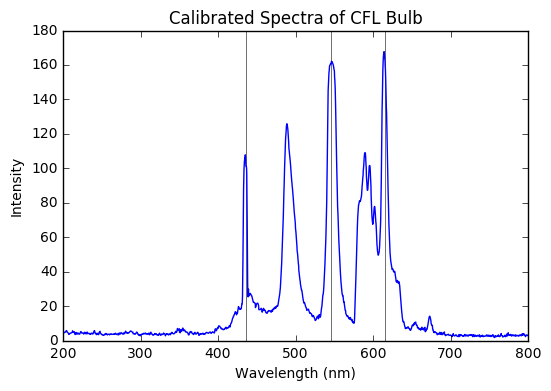

In [643]:
plt.plot(calibrated_index,img1d)
plt.xlim(200,800)
plt.vlines(y, 0, 180, lw=0.4)
plt.title('Calibrated Spectra of CFL Bulb')
plt.ylabel('Intensity')
plt.xlabel('Wavelength (nm)')